## Load Status Prediction

### IMPORT LIBRARY 

In [50]:
import pandas as pd  ##for data manipulation
import numpy as np   # for linear algebra 
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in various formats. 
import seaborn as sns  # Python data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # for Precision and Recall Analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### LOAD AND READ DATA 

In [51]:
data=pd.read_csv(r"C:\Users\Selvam\Downloads\project\Loan Status Prediction\loan_data.csv")

### DATA EXPLORATION

In [52]:
data.shape

(381, 13)

In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [54]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [56]:
data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
data.dropna(inplace=True)

In [58]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### DATA VISUALIZATION

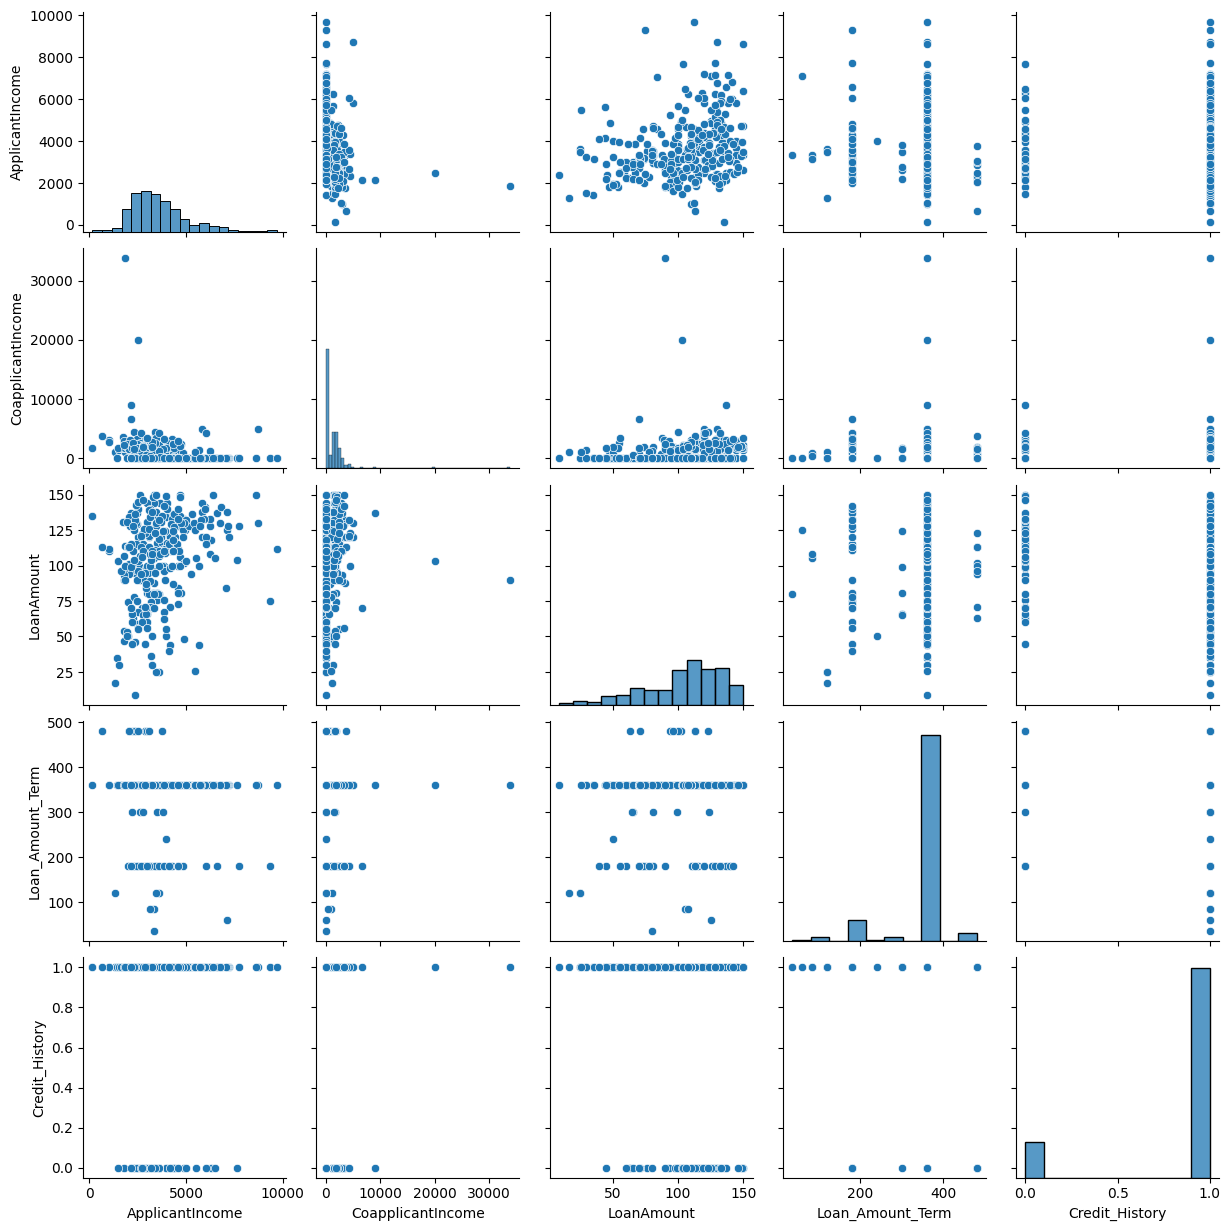

In [60]:
sns.pairplot(data)

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

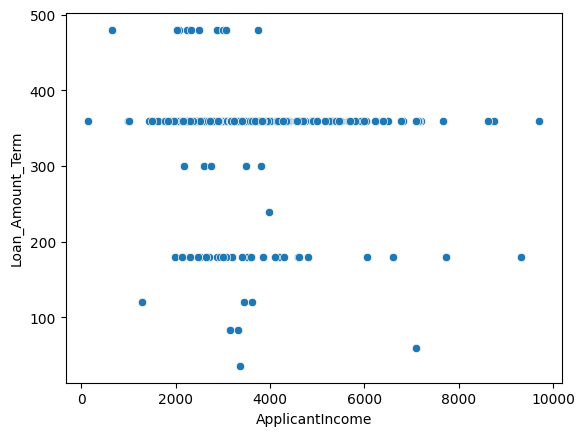

In [61]:
sns.scatterplot(data = data , x='ApplicantIncome' , y='Loan_Amount_Term')

<Axes: xlabel='Gender', ylabel='count'>

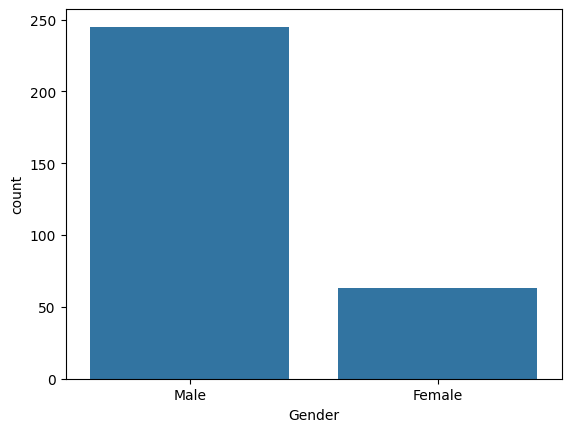

In [62]:
sns.countplot(data=data,x='Gender')
#  countplot for Frequency Counts & Data Exploration

<Axes: >

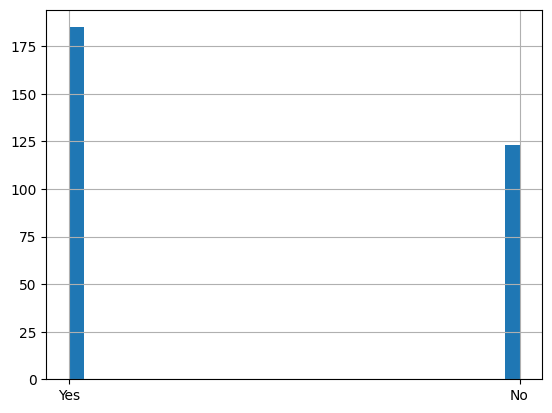

In [63]:
data['Married'].hist(bins=30) # histplot  for Visualizing Data Distribution 

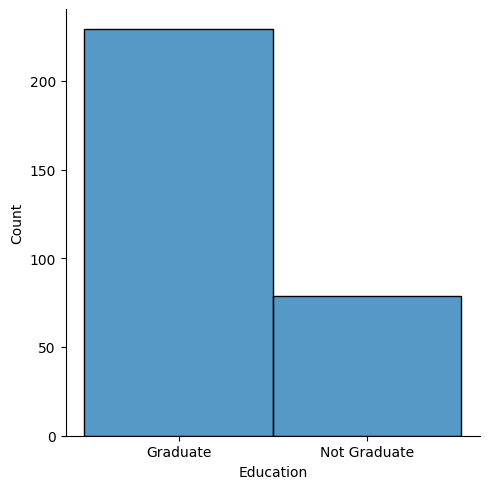

In [64]:
sns.displot(data['Education'])

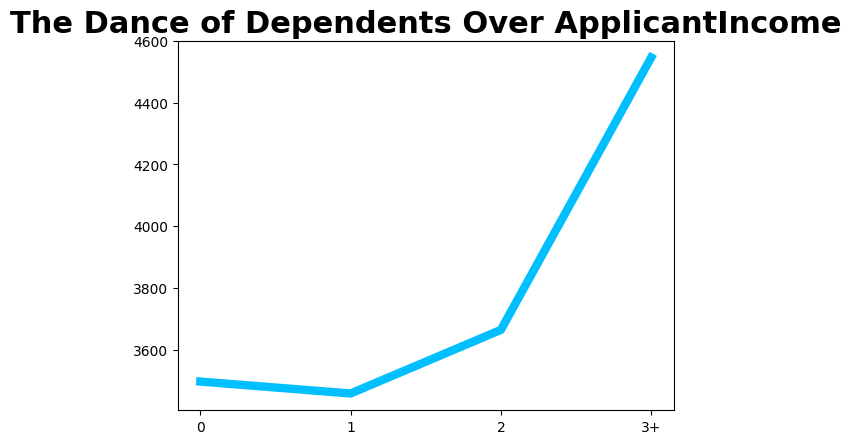

In [65]:
Income = data.groupby("Dependents")["ApplicantIncome"].mean()
plt.plot(Income.index, Income.values, color="deepskyblue", linewidth=6)
plt.title("The Dance of Dependents Over ApplicantIncome", fontsize=22, fontweight="bold")
plt.show()

### DATA PREPROCESSING 

In [66]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [68]:
for col in x.columns:
    x[col] = label_encoder.fit_transform(x[col]) ## HANDEL X 

In [69]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,1,0,0,209,42,74,7,1,0
1,1,1,1,0,0,1,98,0,23,7,1,2
2,2,1,1,0,1,0,66,108,66,7,1,2
3,3,1,0,0,0,0,245,0,87,7,1,2
4,4,1,1,0,1,0,49,43,41,7,1,2


In [70]:
y.unique()

array(['N', 'Y'], dtype=object)

In [71]:
mapper_loan={'N':0,'Y':1}
y=y.map(mapper_loan) # HANDEL Y 

In [72]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

### SPLIT DATA

In [73]:

x_train , x_test , y_train , y_test = train_test_split (x,y,test_size = .3 ,shuffle = True , random_state =42)

In [74]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (215, 12)
y_train shape =  (215,)
x_test shape =  (93, 12)
y_test shape =  (93,)


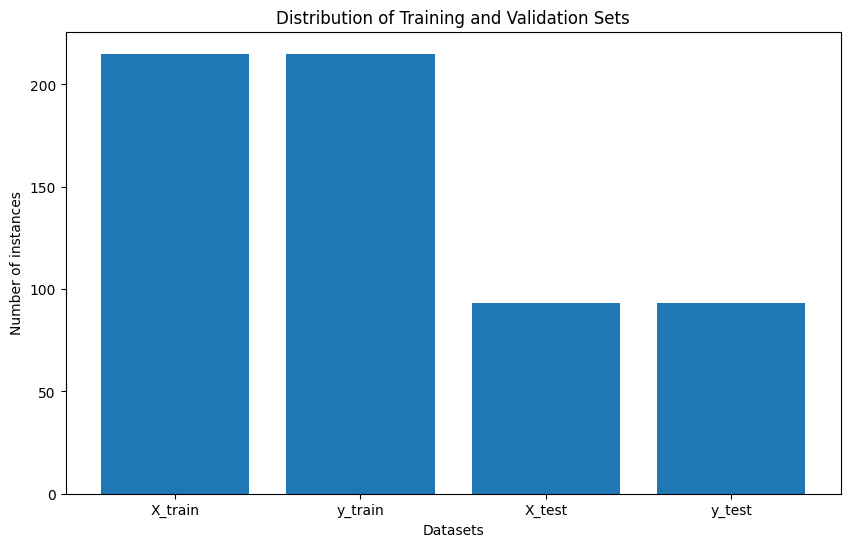

In [75]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### DATA SCSLING 

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### LOGISTIC REGRESSION MODEL

In [78]:
lr_model=LogisticRegression() # call model


In [79]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [80]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [81]:
con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

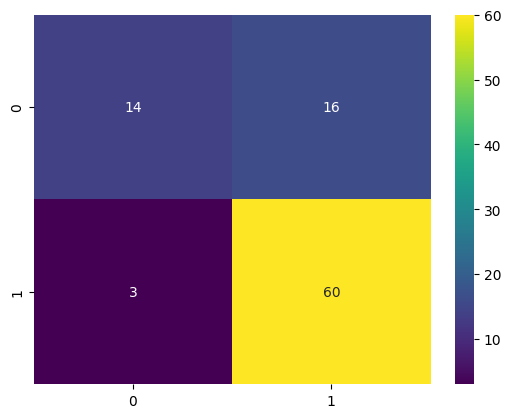

In [82]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

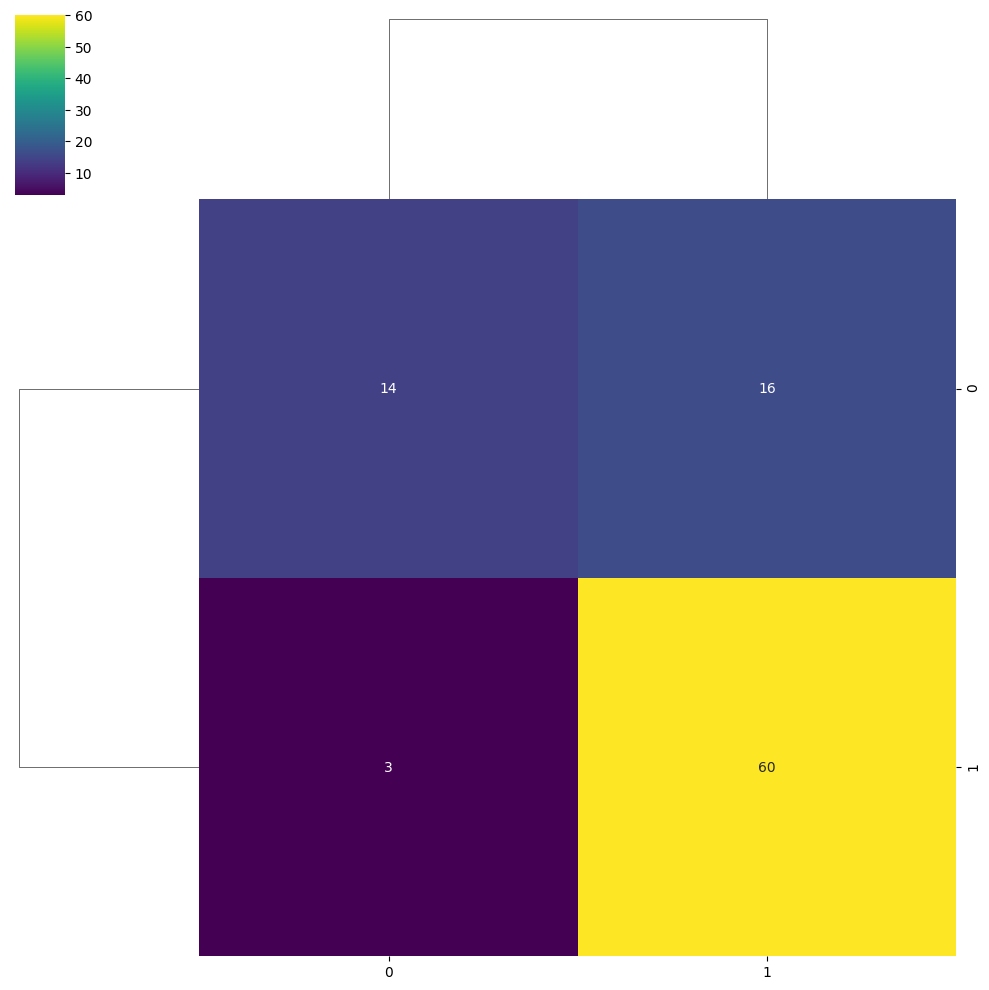

In [83]:
sns.clustermap(con, annot=True, cmap='viridis', cbar=True) # clustermap for Discovering Patterns and Relationships

In [84]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.82      0.47      0.60        30
           1       0.79      0.95      0.86        63

    accuracy                           0.80        93
   macro avg       0.81      0.71      0.73        93
weighted avg       0.80      0.80      0.78        93



### KNN MODEL

In [85]:
knn_model = KNeighborsClassifier()

In [86]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [87]:
knn_pred = knn_model.predict(x_test)

In [88]:
knn_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [89]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.64      0.23      0.34        30
           1       0.72      0.94      0.81        63

    accuracy                           0.71        93
   macro avg       0.68      0.58      0.58        93
weighted avg       0.69      0.71      0.66        93



### GAUSSIANNB MODEL

In [90]:
nb_model = GaussianNB()

In [91]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [92]:
y_pred = nb_model.predict(x_test)

In [93]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49        30
           1       0.00      0.00      0.00        63

    accuracy                           0.32        93
   macro avg       0.16      0.50      0.24        93
weighted avg       0.10      0.32      0.16        93



## **Enhance Model Performance**

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:

from sklearn.model_selection import GridSearchCV

In [97]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(lr_model,
                           parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])

In [98]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.32      1.00      0.49        30
           1       0.00      0.00      0.00        63

    accuracy                           0.32        93
   macro avg       0.16      0.50      0.24        93
weighted avg       0.10      0.32      0.16        93

